In [1]:
import numpy as np
import tensorflow as tf
print("Tensorflow version", tf.__version__)
from tensorflow import keras
print("Keras version", keras.__version__)
import matplotlib.pyplot as plt

np.random.seed(42) 
tf.random.set_seed(42)

Tensorflow version 2.1.0
Keras version 2.2.4-tf


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)

(60000, 28, 28)


In [19]:
X_valid = X_train_full[:5000] / 255.
X_train = X_train_full[5000:] / 255.

y_valid = y_train_full[:5000] 
y_train = y_train_full[5000:]

X_test = X_test / 255.

Class label is: 4
Class name is: Coat


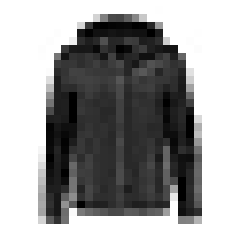

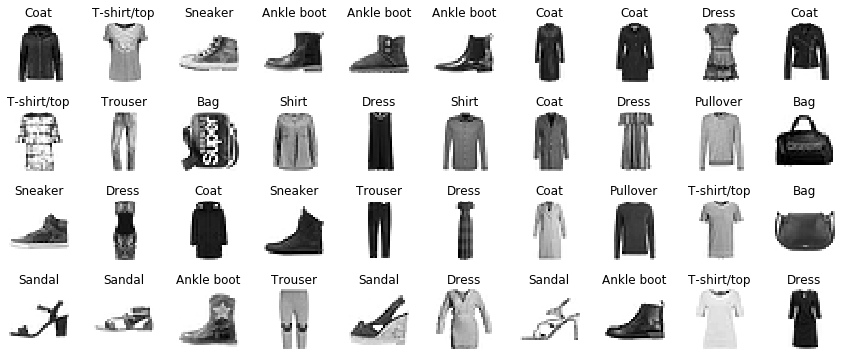

In [28]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [31]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

model.summary()


keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

sgd = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss="sparse_categorical_crossentropy",
      optimizer=sgd,
      metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.4844 - accuracy: 0.8323 - val_loss: 0.4534 - val_accuracy: 0.8494
Epoch 3/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4414 - accuracy: 0.8463 - val_loss: 0.4393 - val_accuracy: 0.8496
Epoch 4/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4128 - accuracy: 0.8549 - val_loss: 0.4175 - val_accuracy: 0.8558
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3926 - accuracy: 0.8616 - val_loss: 0.3810 - val_accuracy: 0.8656
Epoch 6/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3770 - accuracy: 0.8666 - val_loss: 0.3729 - val_accuracy: 0.8684
Epoch 7/30
55000/55000 [==============================] -

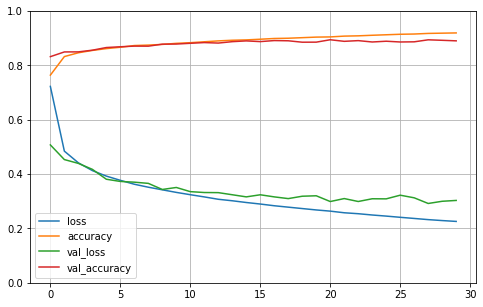

In [35]:
history = model.fit(X_train, y_train, epochs=30,
            validation_data=(X_valid, y_valid))

print(history.params)

hidden1 = model.layers[1]
print(hidden1.name)

weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3362 - accuracy: 0.8777
[0.33624030063152316, 0.8777]
[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


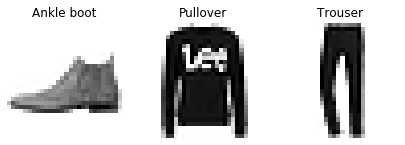

In [39]:
print(model.evaluate(X_test, y_test))

y_pred = model.predict_classes(X_test[:3])
print(y_pred)
print([class_names[index] for index in y_pred])

plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()